In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
excel_filepath = 'cleaned_data/politics_top_past_wk_2024-07-10_06-27-54_cleaned.xlsx'
excel_data = pd.ExcelFile(excel_filepath)

In [17]:
all_comments = pd.DataFrame(columns=['comment_body', 'comment_score'])

In [18]:
dfs = []

for sheet_name in excel_data.sheet_names:
    sheet_df = pd.read_excel(excel_filepath, sheet_name=sheet_name)
    dfs.append(sheet_df)

In [19]:
all_comments = pd.concat(dfs, ignore_index=True)

In [20]:
all_comments.shape

(26931, 2)

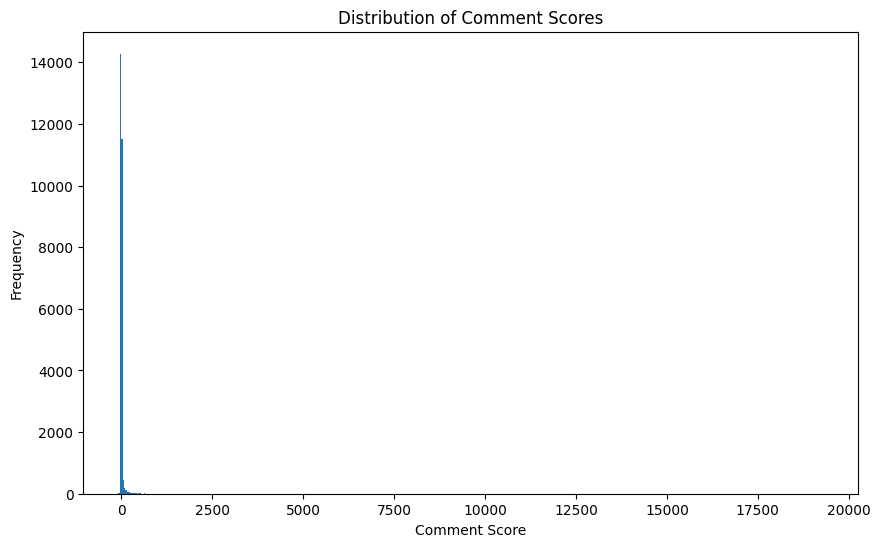

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(all_comments['comment_score'], bins=500)
plt.title('Distribution of Comment Scores')
plt.xlabel('Comment Score')
plt.ylabel('Frequency')
plt.show()

In [22]:
#Nearly all comments have a score of approximately 1
# removing all coments with scores between -5 and 5
filtered_comments = all_comments[(all_comments['comment_score'] < -5) | (all_comments['comment_score'] > 5)]

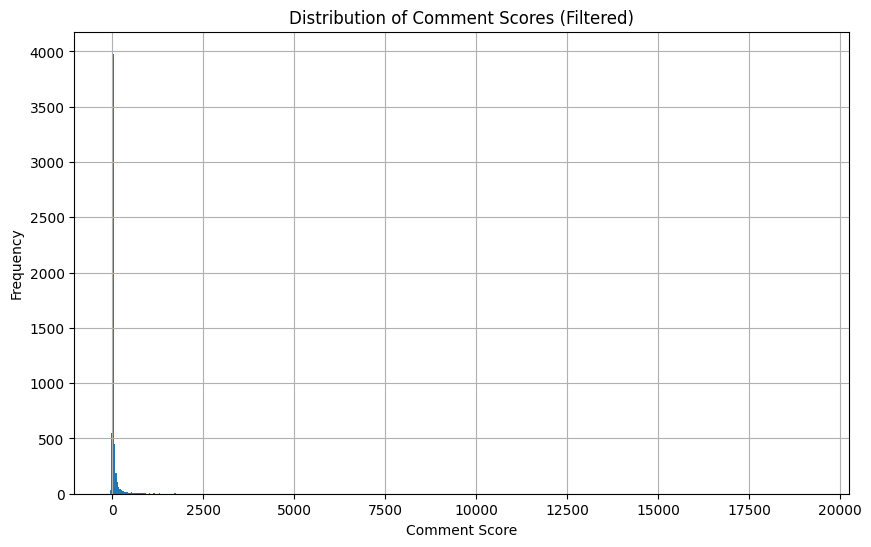

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_comments['comment_score'], bins=500)
plt.title('Distribution of Comment Scores (Filtered)')
plt.xlabel('Comment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
filtered_comments.shape

(5655, 2)

In [25]:
sid = SentimentIntensityAnalyzer()

# so I can iteratively perform sentiment analysis on each comment
def analyze_sentiment(comment):
    if isinstance(comment, str):
        return sid.polarity_scores(comment)
    else:
        return {'neg': None, 'neu': None, 'pos': None, 'compound': None}

In [26]:
# applying sentiment analysis function to each comment
filtered_comments['sentiment'] = filtered_comments['comment_body'].apply(analyze_sentiment)


C:\Users\rswin\AppData\Local\Temp\ipykernel_20312\1753891194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments['sentiment'] = filtered_comments['comment_body'].apply(analyze_sentiment)


In [33]:
# extracting sentiment scores into different columns
filtered_comments[['neg', 'neu', 'pos', 'compound']] = filtered_comments['sentiment'].apply(pd.Series)

# filtered_comments = filtered_comments.join(sentiment_df)

C:\Users\rswin\AppData\Local\Temp\ipykernel_20312\2857050183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments[['neg', 'neu', 'pos', 'compound']] = filtered_comments['sentiment'].apply(pd.Series)
C:\Users\rswin\AppData\Local\Temp\ipykernel_20312\2857050183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments[['neg', 'neu', 'pos', 'compound']] = filtered_comments['sentiment'].apply(pd.Series)
C:\Users\rswin\AppData\Local\Temp\ipykernel_20312\2857050183.py:2: SettingWithCo

In [34]:
# displaying the data
filtered_comments.head(30)

,comment_body,comment_score,sentiment,neg,neu,pos,compound
0,This needs to be the talking point for the res...,6558,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.000,0.945,0.055,0.4019
1,Tie him to them and sink him with them.\n\n[He...,6167,"{'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'comp...",0.000,0.956,0.044,0.3400
2,"Dems must, must, must start running 24/7 ads a...",3215,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,"Remember, a big reason this happened was not b...",2441,"{'neg': 0.026, 'neu': 0.872, 'pos': 0.101, 'co...",0.026,0.872,0.101,0.7089
4,I think it already is becoming that.\n\nNow th...,1976,"{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'comp...",0.108,0.892,0.000,-0.5256
5,"They wrote most, if not all of reagans policie...",1720,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6,This is why they want to eliminate education f...,1546,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.000,0.860,0.140,0.0772
7,Which is insane to me because they’ve literall...,1269,"{'neg': 0.121, 'neu': 0.712, 'pos': 0.167, 'co...",0.121,0.712,0.167,0.3952
8,Having a candidate that even mentions it at al...,873,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.000,0.872,0.128,0.4215
9,John Oliver did a good overview of the project...,817,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.000,0.778,0.222,0.8126


In [35]:
filtered_comments.shape

(5655, 7)

In [36]:
filtered_comments.isna().sum()

comment_body     0
comment_score    0
sentiment        0
neg              0
neu              0
pos              0
compound         0
dtype: int64

In [37]:
filtered_comments.describe()

,comment_score,neg,neu,pos,compound
count,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000
mean,68.582493,0.107468,0.788348,0.104181,-0.027491
std,417.076380,0.121778,0.151273,0.114023,0.536264
min,-76.000000,0.000000,0.000000,0.000000,-0.997600
25%,7.000000,0.000000,0.705000,0.000000,-0.492750
50%,12.000000,0.084000,0.794000,0.085000,0.000000
75%,29.500000,0.166000,0.888000,0.156500,0.417000
max,19288.000000,1.000000,1.000000,1.000000,0.998100


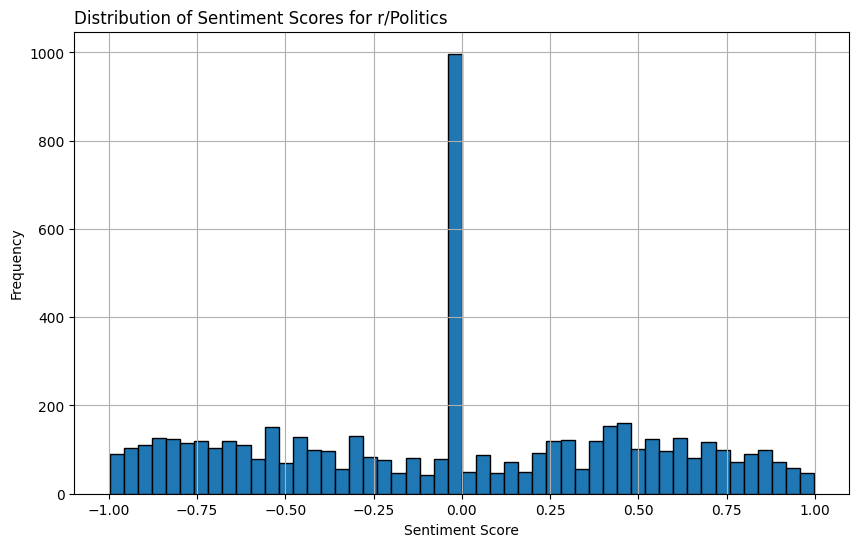

In [38]:
# plotting the results to get a sense of what I've generated
plt.figure(figsize=(10, 6))
plt.hist(filtered_comments['compound'], bins=50, edgecolor='black')
plt.title('Distribution of Sentiment Scores for r/Politics', loc='left')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [290]:
#making directory for sen
directory = 'sentiment_analysis'
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")
else:
    print(f"Directory '{directory}' already exists.")

Directory 'sentiment_analysis' already exists.


In [291]:
#creating the filename
base_filename = os.path.basename(excel_filepath)
filename_wo_ext = os.path.splitext(base_filename)[0]
new_filename = f"{filename_wo_ext}_sentiment_analysis.csv"
csv_filepath = os.path.join(directory, new_filename)

In [292]:
#saving the dataframe to the specified path using the generated filename
filtered_comments.to_csv(csv_filepath, index=False)

print(f"CSV file saved to {csv_filepath}")

CSV file saved to sentiment_analysis\worldnews_top_past_wk_2024-07-10_05-44-54_cleaned_sentiment_analysis.csv


# Saving all dataframes as a single .csv

In [293]:
#concatenating all files that sentiment analysis has been performed on using sentiment analysis:
directory = 'sentiment_analysis'

In [294]:
#creating an empty dataframe object
all_data = pd.DataFrame()

#looping through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        data = pd.read_csv(file_path)
        
        # adding the subreddit name to every row of the dataframe. This will be my y
        subreddit = filename.split('_')[0]
        
        data['subreddit'] = subreddit
        
        # appending the data from every spreadsheet into a single dataframe
        all_data = pd.concat([all_data, data], ignore_index=True)

In [295]:
print(all_data.head())

                                        comment_body  comment_score  \
0  I can't wait for him to file evidence that she...           1608   
1  "Here is a receipt labeled 'Bribe for Judge Ca...           1316   
2  I think the Supreme Court ruled that is just f...            578   
3  Hey Cannon, remember Ricky Shiffer the derange...            513   
4  Cannon has no clue what she's getting into. Wh...            494   

                                           sentiment    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
1  {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...  0.196  0.804  0.000   
2  {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...  0.000  0.597  0.403   
3  {'neg': 0.196, 'neu': 0.763, 'pos': 0.041, 'co...  0.196  0.763  0.041   
4  {'neg': 0.038, 'neu': 0.741, 'pos': 0.221, 'co...  0.038  0.741  0.221   

   compound subreddit  
0    0.0000  politics  
1   -0.4423  politics  
2    0.6597  politics  
3   -0.7968  p

In [296]:
all_data.shape

(14330, 8)

In [297]:
# saving the combined data to a .csv 
output_directory = 'complete_dataset'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Directory '{output_directory}' created.")
else:
    print(f"Directory '{output_directory}' already exists.")

Directory 'complete_dataset' already exists.


In [298]:
combined_file_path = os.path.join(output_directory, 'combined_sentiment_analysis.csv')

In [299]:
all_data.to_csv(combined_file_path, index=False)
print(f"Combined data saved to {combined_file_path}")

Combined data saved to complete_dataset\combined_sentiment_analysis.csv
